In [189]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.iloc[:43]

,Unnamed: 0,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class
0,0,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23,CHEMBL3326305,42300.0,inactive
1,1,O=C1Sc2c(S(=O)(=O)Nc3ccc(O)cc3)cc(S(=O)(=O)Nc3...,CHEMBL3326315,14000.0,inactive
2,2,O=S(=O)(Nc1cc(Cl)c(O)c(Cl)c1)c1ccc2ccccc2c1,CHEMBL3356478,100000.0,inactive
3,3,O=S(=O)(Nc1ccc(O)c(Cl)c1)c1ccc(F)cc1,CHEMBL3314616,100000.0,inactive
4,4,Cc1cc2occ(CN(C)CCN(C)Cc3cn(-c4cccc(C(F)(F)F)c4...,CHEMBL3326318,20300.0,inactive
5,5,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23,CHEMBL3326305,45700.0,inactive
6,6,O=C1Sc2c(S(=O)(=O)Nc3ccc(O)cc3)cc(S(=O)(=O)Nc3...,CHEMBL3326315,25300.0,inactive
7,8,Cc1cc2occ(CN3CCN(Cc4cn(-c5cccc(C(F)(F)F)c5)c5c...,CHEMBL3741761,10000.0,inactive
8,9,Cc1ccc2occ(CN(C)CCN(C)Cc3cn(-c4cccc(C(F)(F)F)c...,CHEMBL3739952,30000.0,inactive
9,10,Cc1ccc2occ(CN3CCN(Cc4cn(-c5cccc(C(F)(F)F)c5)c5...,CHEMBL3741215,30000.0,inactive


In [4]:
smiles = list(data['canonical_smiles'])
len(smiles[44])

68

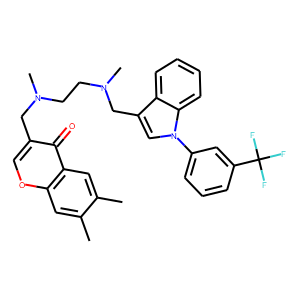

In [5]:
mol = Chem.MolFromSmiles(smiles[44])
Draw.MolToImage(mol)

In [6]:
alphabet = []
for smile in smiles:
    for i, s in enumerate(smile):
        if smile[i] not in alphabet:
            alphabet.append(s)

In [7]:
def smile_to_array(smile, alphabet):
    hight = len(alphabet)
    width = len(smile)
    array = np.zeros((hight, width))
    for i in range(hight):
        for j in range(width):
            if smile[j] == alphabet[i]:
                array[i, j] = 1
    return array

In [8]:
def array_to_smile(array, alphabet):
    smile = ''
    for i in range(array.shape[1]):
        for j in range(array.shape[0]):
            if array[j, i] == 1:
                s = alphabet[j]
                smile = smile+s
    return smile

In [9]:
all_arrs = []
max_width = 0
for s in smiles:
    array = smile_to_array(s, alphabet)
    all_arrs.append(array)
    if array.shape[1] > max_width:
        max_width = array.shape[1]

In [10]:
def pad_data(data, max_width):
    for i, arr in enumerate(data):
        to_padd = max_width - arr.shape[1]
        data[i] = np.pad(arr, ((0, 0), (0, to_padd)), 'constant')
    return data

In [11]:
new_data = pad_data(all_arrs, max_width)

In [12]:
final_arr = np.array(new_data)

In [13]:
X  = final_arr.reshape(-1, 32, 649, 1)

In [14]:
y = list(data['bioactivity_class'])

In [15]:
data.bioactivity_class.unique()

array(['inactive', 'active'], dtype=object)

In [16]:
for i, cls in enumerate(y):
    if y[i] == 'inactive':
        y[i] = 0
    else:
        y[i] = 1

In [17]:
y = np.array(y)
y = y.reshape(-1, 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, Activation, GlobalMaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [167]:
x_input = Input((32, 649, 1))
#first convolution
x = Conv2D(64, (32, 6), strides = (1, 1), padding = 'valid')(x_input)
x = Activation('relu')(x)
x = MaxPool2D((1,2))(x)
#second convolution
x = Conv2D(64, (1, 6), strides = (1, 1), padding = 'valid')(x)
x = Activation('relu')(x)
x = MaxPool2D((1,2))(x)
#Global pooling
x_after_pool = GlobalMaxPooling2D()(x)
#Dense
x = Flatten()(x_after_pool)
x = Dense(64, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(x_input, outputs = x)

In [168]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 649, 1)]      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 644, 64)        12352     
_________________________________________________________________
activation_16 (Activation)   (None, 1, 644, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 322, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 317, 64)        24640     
_________________________________________________________________
activation_17 (Activation)   (None, 1, 317, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 158, 64)        0   

In [169]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [170]:
r = model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6640 - accuracy: 0.7443
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5556 - accuracy: 0.7305
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.4886 - accuracy: 0.7313
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.4922 - accuracy: 0.6927
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.4087 - accuracy: 0.7397
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.3599 - accuracy: 0.9124
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 0.8972
Epoch 8/10
8/8 [==============================] - 0s 8ms/step - loss: 0.2568 - accuracy: 0.9289
Epoch 9/10
8/8 [==============================] - 0s 8ms/step - loss: 0.2538 - accuracy: 0.9166
Epoch 10/10
8/8 [==============================] - 0s 8ms/step - loss: 0.2180 - accuracy: 0.9239


In [171]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9339


[0.1978195756673813, 0.93388432264328]

In [172]:
weights = model.get_weights()

In [175]:
x_input = Input((32, 649, 1))
#first convolution
x = Conv2D(64, (32, 6), strides = (1, 1), padding = 'valid')(x_input)
x = Activation('relu')(x)
x = MaxPool2D((1,2))(x)
#second convolution
x = Conv2D(64, (1, 6), strides = (1, 1), padding = 'valid')(x)
x = Activation('relu')(x)
x = MaxPool2D((1,2))(x)
#Global pooling
x = GlobalMaxPooling2D()(x)
#Dense
model2 = Model(x_input, outputs = x)

In [176]:
model2.set_weights(weights[:4])

In [177]:
prd = model2.predict(X_train)

In [190]:
sc = StandardScaler()

In [194]:
prd1 = sc.fit_transform(prd)

In [213]:
filters_nums = []
for i in prd1:
    for index, j in enumerate(i):
        if j>=2.9:
            filters_nums.append(index)

In [222]:
filters_nums.sort() #8

In [220]:
filters, biases = model.layers[1].get_weights()

In [227]:
filtr = filters[:,:,:,8]

In [231]:
filtr = filtr.reshape(32, 6)

In [248]:
filtr.round(4)

array([[-0.0092, -0.0048, -0.0111, -0.0211,  0.002 , -0.0112],
       [-0.0273, -0.0077,  0.0008,  0.0155, -0.0289, -0.033 ],
       [ 0.0093,  0.0264,  0.0365,  0.0136,  0.0016, -0.0232],
       [-0.0059, -0.0354, -0.03  , -0.0192, -0.014 ,  0.0016],
       [-0.0474, -0.0254, -0.0371, -0.0054,  0.0292,  0.0207],
       [ 0.0038, -0.0186,  0.0165,  0.0058,  0.0645,  0.0217],
       [-0.0074,  0.0362,  0.0632, -0.0355, -0.029 ,  0.0231],
       [-0.0436,  0.0367,  0.0248, -0.0009, -0.0505,  0.043 ],
       [ 0.0278, -0.0338,  0.0338,  0.0199,  0.0028, -0.0036],
       [ 0.0204, -0.047 , -0.0498,  0.046 , -0.0115,  0.0292],
       [-0.0212,  0.0193,  0.0288,  0.0201,  0.047 , -0.0317],
       [-0.0136, -0.0415, -0.0193,  0.0247, -0.0203,  0.0212],
       [ 0.0129, -0.0363, -0.0034,  0.0178,  0.0365,  0.0159],
       [ 0.0007, -0.0174, -0.0219,  0.0443, -0.0073,  0.0078],
       [ 0.0148, -0.0135, -0.0203, -0.0164, -0.0213, -0.0048],
       [ 0.02  ,  0.0101, -0.0466,  0.0356,  0.0029,  0

In [240]:
l = []
for i, f in enumerate(filtr):
    l.append((i, max(f)))

In [242]:
l.sort()

In [243]:
l

[(0, 0.0019957228),
 (1, 0.015452803),
 (2, 0.03646312),
 (3, 0.0016219228),
 (4, 0.029171757),
 (5, 0.06449321),
 (6, 0.063150935),
 (7, 0.042968486),
 (8, 0.033809833),
 (9, 0.04604862),
 (10, 0.04695129),
 (11, 0.024676064),
 (12, 0.036495302),
 (13, 0.04428102),
 (14, 0.014817274),
 (15, 0.03561191),
 (16, 0.049252752),
 (17, 0.021030499),
 (18, 0.047797292),
 (19, 0.018563969),
 (20, 0.018115502),
 (21, 0.06363835),
 (22, 0.042124994),
 (23, 0.02759881),
 (24, 0.036649484),
 (25, 0.020684255),
 (26, 0.050601754),
 (27, 0.015563299),
 (28, 0.043719698),
 (29, 0.04092794),
 (30, 0.040426664),
 (31, 0.024839224)]

In [260]:
sum(np.convolve(final_arr[0][0], filtr[0], 'valid'))

-0.17734209075570107

In [259]:
final_arr[0][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [261]:
filtr[0]

array([-0.00918147, -0.00481042, -0.01105472, -0.02112496,  0.00199572,
       -0.01120363], dtype=float32)

In [257]:
final_arr[0][0].shape

(649,)